In [64]:
import pandas as pd
import numpy as np
import os
import plotly.express as px
from sklearn.linear_model import LinearRegression
from scipy.stats import spearmanr


<h3>Challenge: Explain the price variation of 24h electricity futures contracts in France and Germany</h3>
<ul>
<li>Futures contracts = Agreements to buy/sell a commodity or asset sometime in the future</li>
<li>Explainatory data = Weather, commodities prices, energy production</li><br>
This is not a prediction challenge, trying to explain what happen today with the data that happen today (production, temperature) 

<h3>The data</h3>
<ul>
<li>Commodity prices</li>
-Natural gas, coal, carbon emissions<br><br>
<li>Weather</li>
-Temperature, rain, wind<br><br>
<li>Energy prodction & mix</li>
-Nuclear, gas, coal, solar, wind, hydro, lignite<br><br>
<li>Electrycity use</li>
-Consumption per country, residual load, import/export<br><br>
</ul>

<h3>Residual Load:</h3> electricity consumption after using all the renewable energies

<h3>Metric: Spearman's correlation</h3>
-Robust measure of correlation given the high volatility in electricity prices

In [51]:
data_path = './data/'
df_X_train = pd.read_csv(data_path+'X_train.csv')#.drop(['COUNTRY'], axis=1).fillna(0) # given by the benchmark
df_X_test = pd.read_csv(data_path+'X_test.csv')
df_y_train = pd.read_csv(data_path+'Y_train.csv')

In [52]:
df_X_train

ID  DAY_ID COUNTRY  DE_CONSUMPTION  FR_CONSUMPTION  DE_FR_EXCHANGE  \
0     1054     206      FR        0.210099       -0.427458       -0.606523   
1     2049     501      FR       -0.022399       -1.003452       -0.022063   
2     1924     687      FR        1.395035        1.978665        1.021305   
3      297     720      DE       -0.983324       -0.849198       -0.839586   
4     1101     818      FR        0.143807       -0.617038       -0.924990   
...    ...     ...     ...             ...             ...             ...   
1489   459     809      DE        1.529204        1.106682       -1.855327   
1490  1674     887      FR        1.618582        1.752840        0.611392   
1491   748    1083      DE        0.856399        0.489199       -0.255778   
1492  1454    1133      FR        0.560689       -0.343777       -0.830239   
1493   359    1118      DE        0.226730       -0.711005        0.873016   

      FR_DE_EXCHANGE  DE_NET_EXPORT  FR_NET_EXPORT  DE_NET_IMPORT  ...  \
0           0.606523            NaN       0.692860            NaN  ...   
1           0.022063      -0.573520      -1.130838       0.573520  ...   
2          -1.021305      -0.622021      -1.682587       0.622021  ...   
3           0.839586      -0.270870       0.563230       0.270870  ...   
4           0.924990            NaN       0.990324            NaN  ...   
...              ...            ...            ...            ...  ...   
1489        1.855327      -0.218658       1.450426       0.218658  ...   
1490       -0.611392       0.449153      -0.152146      -0.449153  ...   
1491        0.255778      -1.531544      -0.829568       1.531544  ...   
1492        0.830239      -0.304856       1.210230       0.304856  ...   
1493       -0.873016       0.296651      -1.547075      -0.296651  ...   

      FR_RESIDUAL_LOAD   DE_RAIN   FR_RAIN   DE_WIND   FR_WIND   DE_TEMP  \
0            -0.444661 -0.172680 -0.556356 -0.790823 -0.283160 -1.069070   
1            -1.183194 -1.240300 -0.770457  1.522331  0.828412  0.437419   
2             1.947273 -0.480700 -0.313338  0.431134  0.487608  0.684884   
3            -0.976974 -1.114838 -0.507570 -0.499409 -0.236249  0.350938   
4            -0.526267 -0.541465 -0.424550 -1.088158 -1.011560  0.614338   
...                ...       ...       ...       ...       ...       ...   
1489          0.509514       NaN       NaN       NaN       NaN       NaN   
1490          1.666252       NaN       NaN       NaN       NaN       NaN   
1491          0.358120  0.207905  0.404763 -0.594595  0.894011  0.256338   
1492         -0.184862 -0.682815 -0.390304 -0.972088 -1.501930  1.215528   
1493         -0.634501 -0.757347 -0.744355 -0.482286 -0.941070 -0.120703   

       FR_TEMP   GAS_RET  COAL_RET  CARBON_RET  
0    -0.063404  0.339041  0.124552   -0.002445  
1     1.831241 -0.659091  0.047114   -0.490365  
2     0.114836  0.535974  0.743338    0.204952  
3    -0.417514  0.911652 -0.296168    1.073948  
4     0.729495  0.245109  1.526606    2.614378  
...        ...       ...       ...         ...  
1489       NaN  0.876984  0.819520    1.320373  
1490       NaN  0.932633 -0.085690    0.356356  
1491  0.402316 -1.112899 -0.237835    0.067152  
1492  1.338708  0.962812 -5.392852   -0.843812  
1493  0.391491  1.059829 -0.326640   -0.566724  

[1494 rows x 35 columns]

In [45]:
# Selection of all the duplicates
df_X_train_duplicates = df_X_train.loc[df_X_train[df_X_train.columns[3:]].duplicated(keep=False)]
df_X_train_duplicates.sort_values(by=['DAY_ID'])

ID  DAY_ID COUNTRY  DE_CONSUMPTION  FR_CONSUMPTION  DE_FR_EXCHANGE  \
1408  1327       2      FR       -0.068972       -0.667390       -1.102015   
1468   111       2      DE       -0.068972       -0.667390       -1.102015   
680    800       3      DE       -0.134670       -0.834564       -1.051716   
329   2016       3      FR       -0.134670       -0.834564       -1.051716   
512   2047       5      FR       -0.297850       -0.470371        0.144615   
...    ...     ...     ...             ...             ...             ...   
577    823    1208      DE        0.046568       -0.709011        0.427976   
1007  1987    1212      FR       -0.046100       -0.520506       -0.270515   
986    771    1212      DE       -0.046100       -0.520506       -0.270515   
873   1688    1213      FR        1.407027        1.313254       -0.456126   
1465   472    1213      DE        1.407027        1.313254       -0.456126   

      FR_DE_EXCHANGE  DE_NET_EXPORT  FR_NET_EXPORT  DE_NET_IMPORT  ...  \
1408        1.102015      -1.080403       0.256736       1.080403  ...   
1468        1.102015      -1.080403       0.256736       1.080403  ...   
680         1.051716      -1.881881      -0.612133       1.881881  ...   
329         1.051716      -1.881881      -0.612133       1.881881  ...   
512        -0.144615      -1.208286      -1.811403       1.208286  ...   
...              ...            ...            ...            ...  ...   
577        -0.427976      -0.578391      -1.678101       0.578391  ...   
1007        0.270515      -0.137917      -0.789824       0.137917  ...   
986         0.270515      -0.137917      -0.789824       0.137917  ...   
873         0.456126       0.333142      -0.069222      -0.333142  ...   
1465        0.456126       0.333142      -0.069222      -0.333142  ...   

      FR_RESIDUAL_LOAD   DE_RAIN   FR_RAIN   DE_WIND   FR_WIND   DE_TEMP  \
1408         -0.540642 -0.344600 -0.372156 -0.623041 -0.926064 -0.148950   
1468         -0.540642 -0.344600 -0.372156 -0.623041 -0.926064 -0.148950   
680          -0.856321 -1.394561 -1.118297  0.244859  0.488650 -1.710888   
329          -0.856321 -1.394561 -1.118297  0.244859  0.488650 -1.710888   
512          -0.552878 -1.374757 -0.790071  0.333817  0.021868 -0.062187   
...                ...       ...       ...       ...       ...       ...   
577          -0.666261 -1.224735  2.661142  0.472212  0.630211  1.065727   
1007         -0.589767 -0.039379 -0.237434  1.358211  1.123953 -0.707839   
986          -0.589767 -0.039379 -0.237434  1.358211  1.123953 -0.707839   
873           0.868310       NaN       NaN       NaN       NaN       NaN   
1465          0.868310       NaN       NaN       NaN       NaN       NaN   

       FR_TEMP   GAS_RET  COAL_RET  CARBON_RET  
1408  0.641235  1.802550  1.140920    0.900434  
1468  0.641235  1.802550  1.140920    0.900434  
680  -0.951057  0.440121 -0.064550   -0.032756  
329  -0.951057  0.440121 -0.064550   -0.032756  
512   1.459745 -0.117977  0.550433    0.781870  
...        ...       ...       ...         ...  
577  -1.439105  0.291714  0.568479    0.395742  
1007 -0.308232  0.017778  0.072168   -0.160792  
986  -0.308232  0.017778  0.072168   -0.160792  
873        NaN -0.103642 -0.633007    0.214805  
1465       NaN -0.103642 -0.633007    0.214805  

[1286 rows x 35 columns]

In [49]:
# There are duplicates because each row corresponds to a future price for a country --> meaning each country has its own spot price
df_y_train.loc[df_y_train['ID'].isin([1327, 111])]

ID    TARGET
1408  1327  2.575976
1468   111  0.861270

In [54]:
# French and Deutch sepration
df = pd.merge(df_X_train, df_y_train, on='ID')
df

ID  DAY_ID COUNTRY  DE_CONSUMPTION  FR_CONSUMPTION  DE_FR_EXCHANGE  \
0     1054     206      FR        0.210099       -0.427458       -0.606523   
1     2049     501      FR       -0.022399       -1.003452       -0.022063   
2     1924     687      FR        1.395035        1.978665        1.021305   
3      297     720      DE       -0.983324       -0.849198       -0.839586   
4     1101     818      FR        0.143807       -0.617038       -0.924990   
...    ...     ...     ...             ...             ...             ...   
1489   459     809      DE        1.529204        1.106682       -1.855327   
1490  1674     887      FR        1.618582        1.752840        0.611392   
1491   748    1083      DE        0.856399        0.489199       -0.255778   
1492  1454    1133      FR        0.560689       -0.343777       -0.830239   
1493   359    1118      DE        0.226730       -0.711005        0.873016   

      FR_DE_EXCHANGE  DE_NET_EXPORT  FR_NET_EXPORT  DE_NET_IMPORT  ...  \
0           0.606523            NaN       0.692860            NaN  ...   
1           0.022063      -0.573520      -1.130838       0.573520  ...   
2          -1.021305      -0.622021      -1.682587       0.622021  ...   
3           0.839586      -0.270870       0.563230       0.270870  ...   
4           0.924990            NaN       0.990324            NaN  ...   
...              ...            ...            ...            ...  ...   
1489        1.855327      -0.218658       1.450426       0.218658  ...   
1490       -0.611392       0.449153      -0.152146      -0.449153  ...   
1491        0.255778      -1.531544      -0.829568       1.531544  ...   
1492        0.830239      -0.304856       1.210230       0.304856  ...   
1493       -0.873016       0.296651      -1.547075      -0.296651  ...   

       DE_RAIN   FR_RAIN   DE_WIND   FR_WIND   DE_TEMP   FR_TEMP   GAS_RET  \
0    -0.172680 -0.556356 -0.790823 -0.283160 -1.069070 -0.063404  0.339041   
1    -1.240300 -0.770457  1.522331  0.828412  0.437419  1.831241 -0.659091   
2    -0.480700 -0.313338  0.431134  0.487608  0.684884  0.114836  0.535974   
3    -1.114838 -0.507570 -0.499409 -0.236249  0.350938 -0.417514  0.911652   
4    -0.541465 -0.424550 -1.088158 -1.011560  0.614338  0.729495  0.245109   
...        ...       ...       ...       ...       ...       ...       ...   
1489       NaN       NaN       NaN       NaN       NaN       NaN  0.876984   
1490       NaN       NaN       NaN       NaN       NaN       NaN  0.932633   
1491  0.207905  0.404763 -0.594595  0.894011  0.256338  0.402316 -1.112899   
1492 -0.682815 -0.390304 -0.972088 -1.501930  1.215528  1.338708  0.962812   
1493 -0.757347 -0.744355 -0.482286 -0.941070 -0.120703  0.391491  1.059829   

      COAL_RET  CARBON_RET    TARGET  
0     0.124552   -0.002445  0.028313  
1     0.047114   -0.490365 -0.112516  
2     0.743338    0.204952 -0.180840  
3    -0.296168    1.073948 -0.260356  
4     1.526606    2.614378 -0.071733  
...        ...         ...       ...  
1489  0.819520    1.320373 -0.172597  
1490 -0.085690    0.356356 -0.063546  
1491 -0.237835    0.067152  0.151797  
1492 -5.392852   -0.843812 -0.640917  
1493 -0.326640   -0.566724 -0.252764  

[1494 rows x 36 columns]

In [59]:
df_X_train_fr = df.loc[df['COUNTRY'] == 'FR', df.columns[:-1]].drop(columns=['COUNTRY']).fillna(0)
df_y_train_fr = df.loc[df['COUNTRY'] == 'FR', ['ID', 'TARGET']]

df_X_train_de = df.loc[df['COUNTRY'] == 'DE', df.columns[:-1]].drop(columns=['COUNTRY']).fillna(0)
df_y_train_de = df.loc[df['COUNTRY'] == 'DE', ['ID', 'TARGET']]

In [50]:
# Use one model or treat each country differently ??
# Since each country has its own energy infrastructures, I think it would be preferable to deal with them separately


In [7]:
with pd.option_context('display.max_columns', df_X_train.shape[1]):
    display(df_X_train.describe(include='all'))

ID       DAY_ID  DE_CONSUMPTION  FR_CONSUMPTION  \
count  1494.000000  1494.000000     1494.000000     1494.000000   
mean   1072.759036   591.861446        0.427442       -0.020032   
std     618.013179   345.065043        0.673412        0.918995   
min       0.000000     0.000000       -2.265563       -1.462350   
25%     540.250000   292.250000       -0.037421       -0.716771   
50%    1077.500000   591.000000        0.357061       -0.394166   
75%    1597.500000   885.750000        0.922057        0.650533   
max    2146.000000  1215.000000        2.033851        3.300640   

       DE_FR_EXCHANGE  FR_DE_EXCHANGE  DE_NET_EXPORT  FR_NET_EXPORT  \
count     1494.000000     1494.000000    1494.000000    1494.000000   
mean        -0.143073        0.143073      -0.235057      -0.069240   
std          0.962250        0.962250       0.919546       1.050420   
min         -2.856874       -2.634831      -2.464849      -2.825331   
25%         -0.869990       -0.631683      -0.921263      -0.820640   
50%         -0.119520        0.119520      -0.191500       0.041508   
75%          0.631683        0.869990       0.395910       0.774676   
max          2.634831        2.856874       2.279619       1.951516   

       DE_NET_IMPORT  FR_NET_IMPORT       DE_GAS       FR_GAS      DE_COAL  \
count    1494.000000    1494.000000  1494.000000  1494.000000  1494.000000   
mean        0.235057       0.069240     0.780699     0.395019    -0.134330   
std         0.919546       1.050420     0.850190     0.906500     0.847285   
min        -2.279619      -1.951516    -1.117260    -1.317350    -1.491593   
25%        -0.395910      -0.774676     0.134947    -0.205078    -0.833046   
50%         0.191500      -0.041508     0.740006     0.256780    -0.246732   
75%         0.921263       0.820640     1.399461     1.090646     0.485761   
max         2.464849       2.825331     3.118082     2.372570     2.324889   

           FR_COAL     DE_HYDRO     FR_HYDRO   DE_NUCLEAR   FR_NUCLEAR  \
count  1494.000000  1494.000000  1494.000000  1494.000000  1494.000000   
mean     -0.434518     0.537398     0.105639    -0.468190    -0.446805   
std       0.506141     1.086330     1.057867     0.902468     0.964543   
min      -0.794950    -1.373985    -1.758523    -2.689387    -2.595326   
25%      -0.779098    -0.314520    -0.693892    -0.954908    -1.228912   
50%      -0.766389     0.330832    -0.138049    -0.097032    -0.327874   
75%      -0.262886     1.282374     0.776483     0.100720     0.143426   
max       1.905512     4.181936     3.730478     0.893087     1.854408   

          DE_SOLAR     FR_SOLAR   DE_WINDPOW   FR_WINDPOW   DE_LIGNITE  \
count  1494.000000  1494.000000  1494.000000  1494.000000  1494.000000   
mean      0.246707     0.608185     0.146337     0.398426    -0.298856   
std       1.069899     1.079398     1.064187     1.189404     0.851339   
min      -1.442296    -1.312588    -1.235802    -1.143277    -2.879041   
25%      -0.731345    -0.311343    -0.688284    -0.527749    -0.787239   
50%       0.211219     0.566797    -0.091336     0.007051    -0.188300   
75%       1.158397     1.368670     0.644247     1.010071     0.273510   
max       2.696571     3.648905     3.509017     4.965793     1.586885   

       DE_RESIDUAL_LOAD  FR_RESIDUAL_LOAD      DE_RAIN      FR_RAIN  \
count       1494.000000       1494.000000  1494.000000  1494.000000   
mean           0.071633         -0.153688    -0.035451     0.018139   
std            0.851499          0.896325     0.952789     1.018143   
min           -2.613569         -1.678936    -2.128531    -1.726420   
25%           -0.422896         -0.802333    -0.618791    -0.488625   
50%            0.151799         -0.460160    -0.211042    -0.193154   
75%            0.621209          0.382191     0.274779     0.125947   
max            2.539576          2.918326     7.756118     9.473201   

           DE_WIND      FR_WIND      DE_TEMP      FR_TEMP      GAS_RET  \
count  1494.000000  1

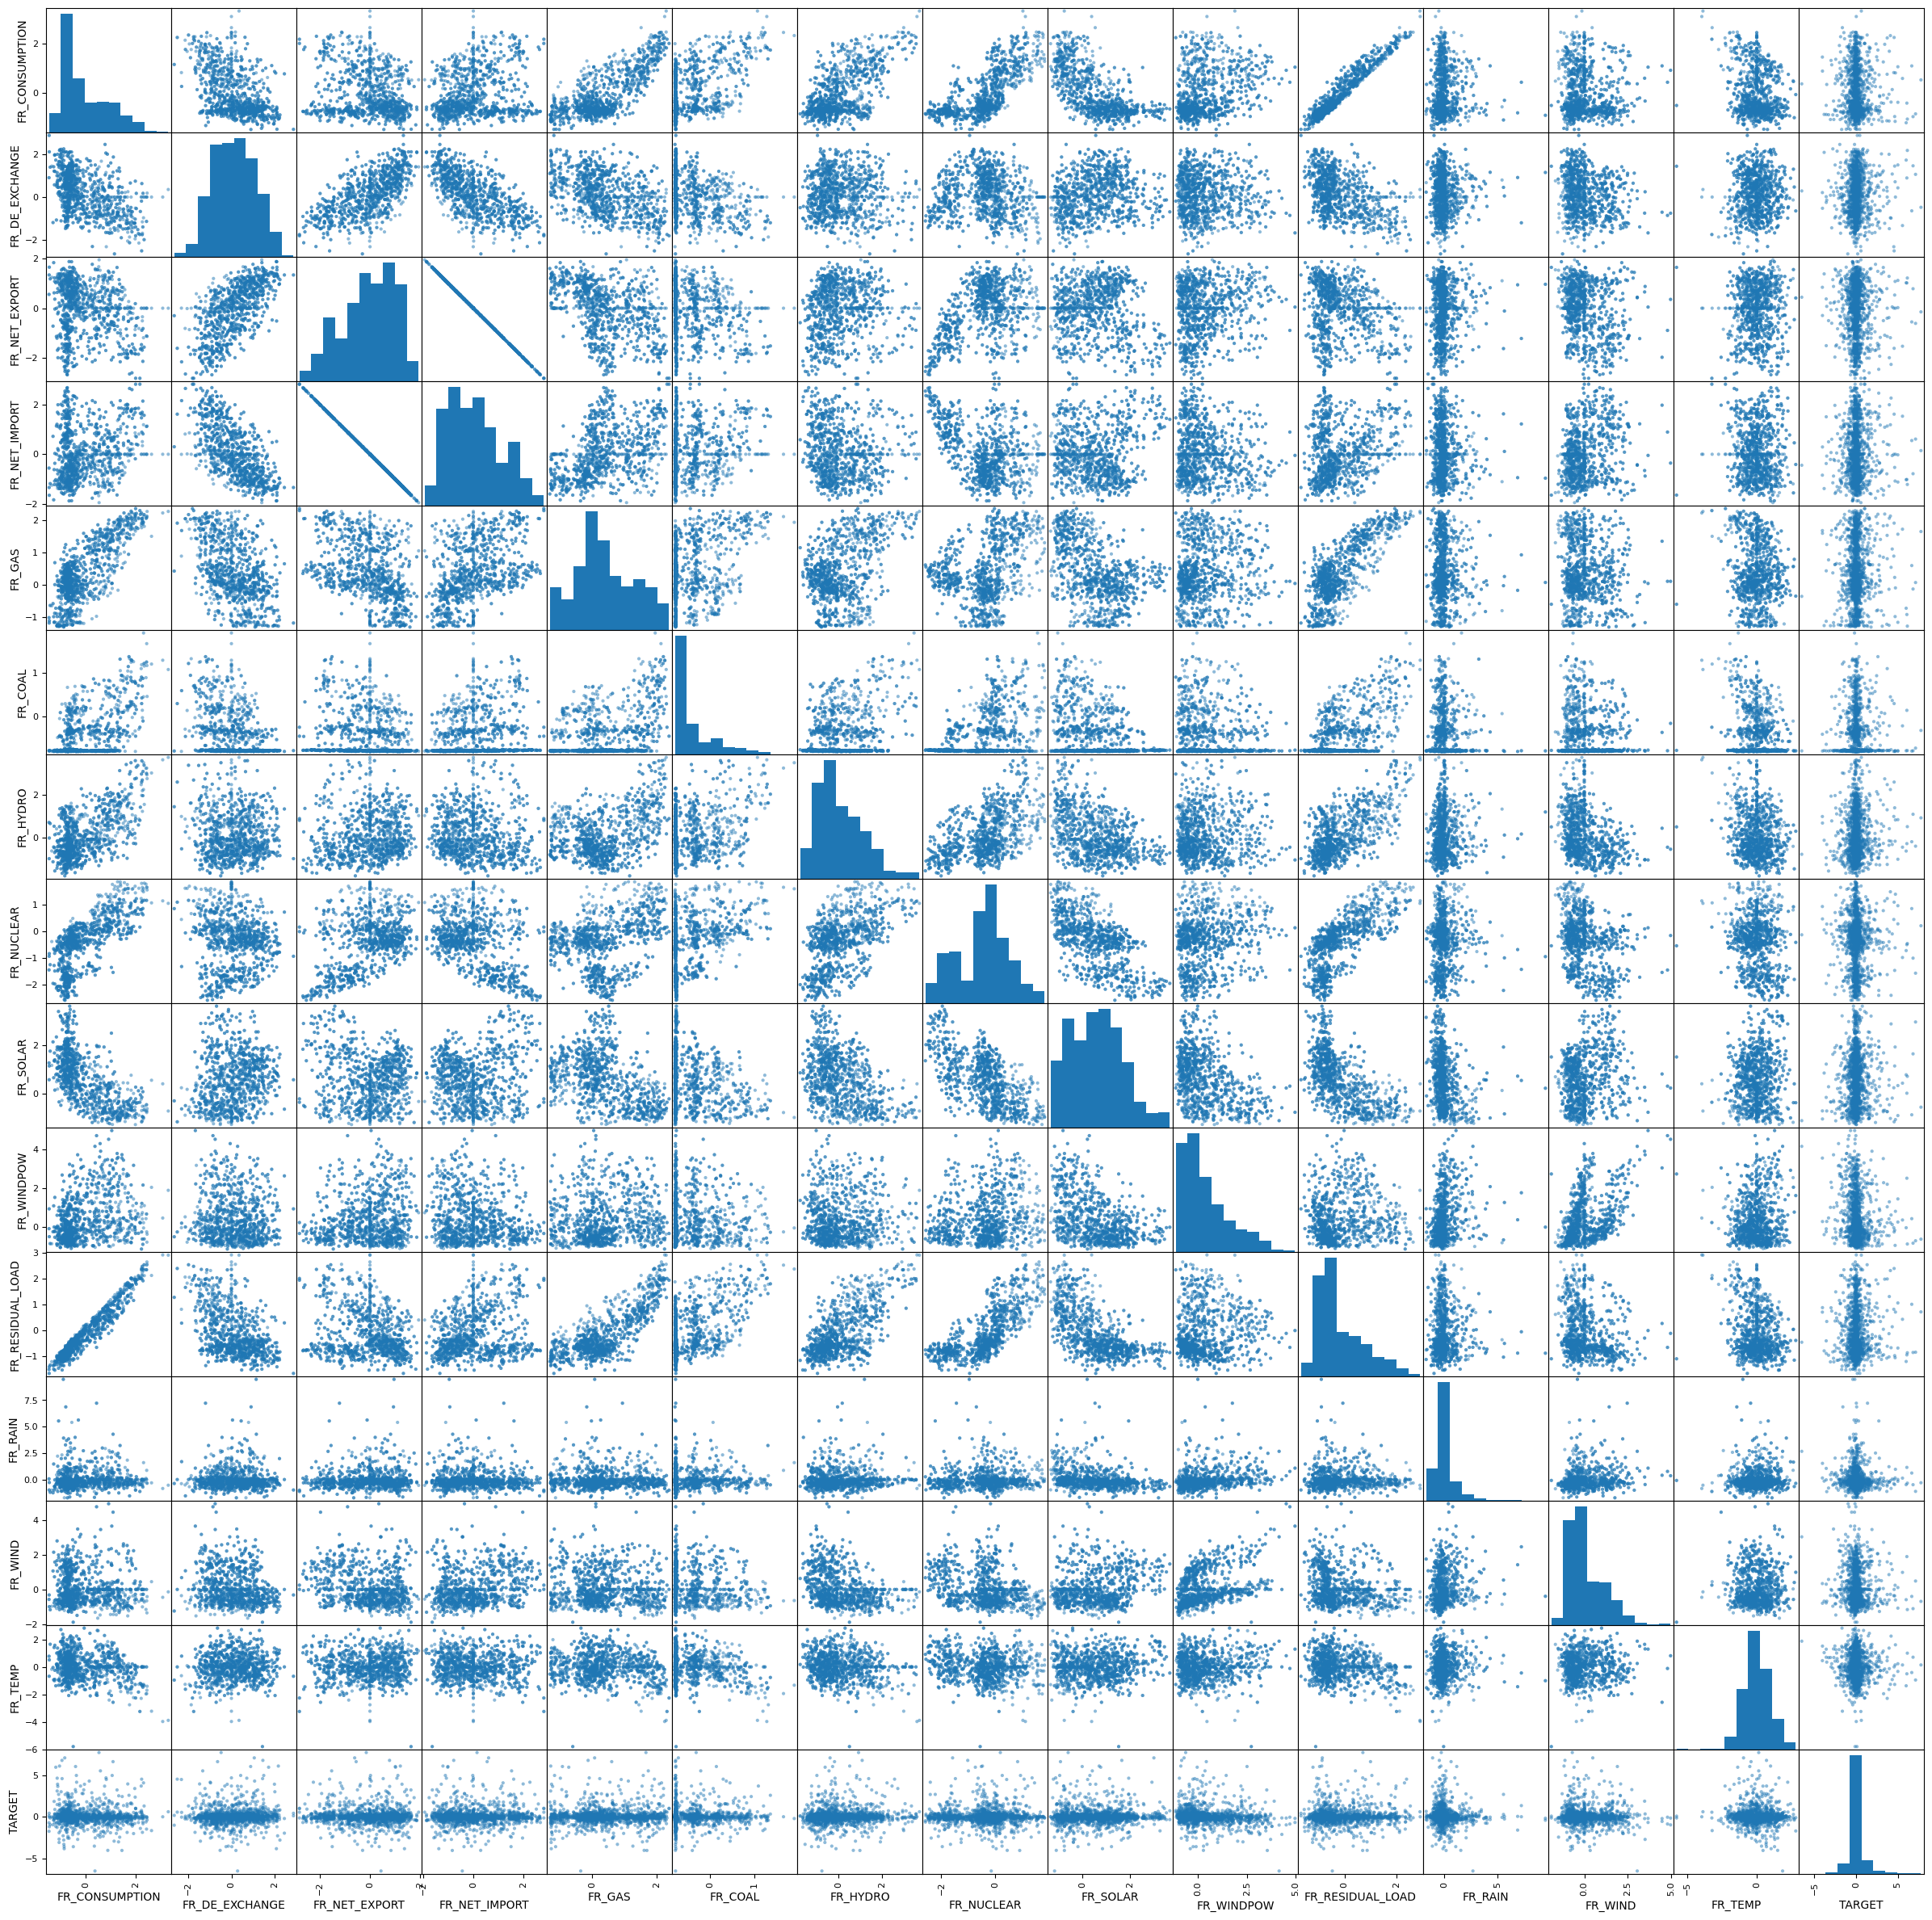

In [51]:
cols_to_plot = [x for x in df_X_train.columns if (x.startswith('FR')) | (x == 'DAY_ID')| (x == 'ID')]

sm = pd.plotting.scatter_matrix(pd.merge(df_X_train[cols_to_plot], df_y_train, on='ID').drop(columns=['DAY_ID', 'ID']), figsize=(30, 30))

correlation plot

In [1]:
! wget https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/visualization.py
import visualization

--2024-10-17 15:48:05--  https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/visualization.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13023 (13K) [text/plain]
Saving to: ‘visualization.py.2’

visualization.py.2  100%[===================>]  12.72K  --.-KB/s    in 0s      

2024-10-17 15:48:06 (38.9 MB/s) - ‘visualization.py.2’ saved [13023/13023]



In [24]:
df_X_train

ID  DAY_ID COUNTRY  DE_CONSUMPTION  FR_CONSUMPTION  DE_FR_EXCHANGE  \
0     1054     206      FR        0.210099       -0.427458       -0.606523   
1     2049     501      FR       -0.022399       -1.003452       -0.022063   
2     1924     687      FR        1.395035        1.978665        1.021305   
3      297     720      DE       -0.983324       -0.849198       -0.839586   
4     1101     818      FR        0.143807       -0.617038       -0.924990   
...    ...     ...     ...             ...             ...             ...   
1489   459     809      DE        1.529204        1.106682       -1.855327   
1490  1674     887      FR        1.618582        1.752840        0.611392   
1491   748    1083      DE        0.856399        0.489199       -0.255778   
1492  1454    1133      FR        0.560689       -0.343777       -0.830239   
1493   359    1118      DE        0.226730       -0.711005        0.873016   

      FR_DE_EXCHANGE  DE_NET_EXPORT  FR_NET_EXPORT  DE_NET_IMPORT  ...  \
0           0.606523            NaN       0.692860            NaN  ...   
1           0.022063      -0.573520      -1.130838       0.573520  ...   
2          -1.021305      -0.622021      -1.682587       0.622021  ...   
3           0.839586      -0.270870       0.563230       0.270870  ...   
4           0.924990            NaN       0.990324            NaN  ...   
...              ...            ...            ...            ...  ...   
1489        1.855327      -0.218658       1.450426       0.218658  ...   
1490       -0.611392       0.449153      -0.152146      -0.449153  ...   
1491        0.255778      -1.531544      -0.829568       1.531544  ...   
1492        0.830239      -0.304856       1.210230       0.304856  ...   
1493       -0.873016       0.296651      -1.547075      -0.296651  ...   

      FR_RESIDUAL_LOAD   DE_RAIN   FR_RAIN   DE_WIND   FR_WIND   DE_TEMP  \
0            -0.444661 -0.172680 -0.556356 -0.790823 -0.283160 -1.069070   
1            -1.183194 -1.240300 -0.770457  1.522331  0.828412  0.437419   
2             1.947273 -0.480700 -0.313338  0.431134  0.487608  0.684884   
3            -0.976974 -1.114838 -0.507570 -0.499409 -0.236249  0.350938   
4            -0.526267 -0.541465 -0.424550 -1.088158 -1.011560  0.614338   
...                ...       ...       ...       ...       ...       ...   
1489          0.509514       NaN       NaN       NaN       NaN       NaN   
1490          1.666252       NaN       NaN       NaN       NaN       NaN   
1491          0.358120  0.207905  0.404763 -0.594595  0.894011  0.256338   
1492         -0.184862 -0.682815 -0.390304 -0.972088 -1.501930  1.215528   
1493         -0.634501 -0.757347 -0.744355 -0.482286 -0.941070 -0.120703   

       FR_TEMP   GAS_RET  COAL_RET  CARBON_RET  
0    -0.063404  0.339041  0.124552   -0.002445  
1     1.831241 -0.659091  0.047114   -0.490365  
2     0.114836  0.535974  0.743338    0.204952  
3    -0.417514  0.911652 -0.296168    1.073948  
4     0.729495  0.245109  1.526606    2.614378  
...        ...       ...       ...         ...  
1489       NaN  0.876984  0.819520    1.320373  
1490       NaN  0.932633 -0.085690    0.356356  
1491  0.402316 -1.112899 -0.237835    0.067152  
1492  1.338708  0.962812 -5.392852   -0.843812  
1493  0.391491  1.059829 -0.326640   -0.566724  

[1494 rows x 35 columns]

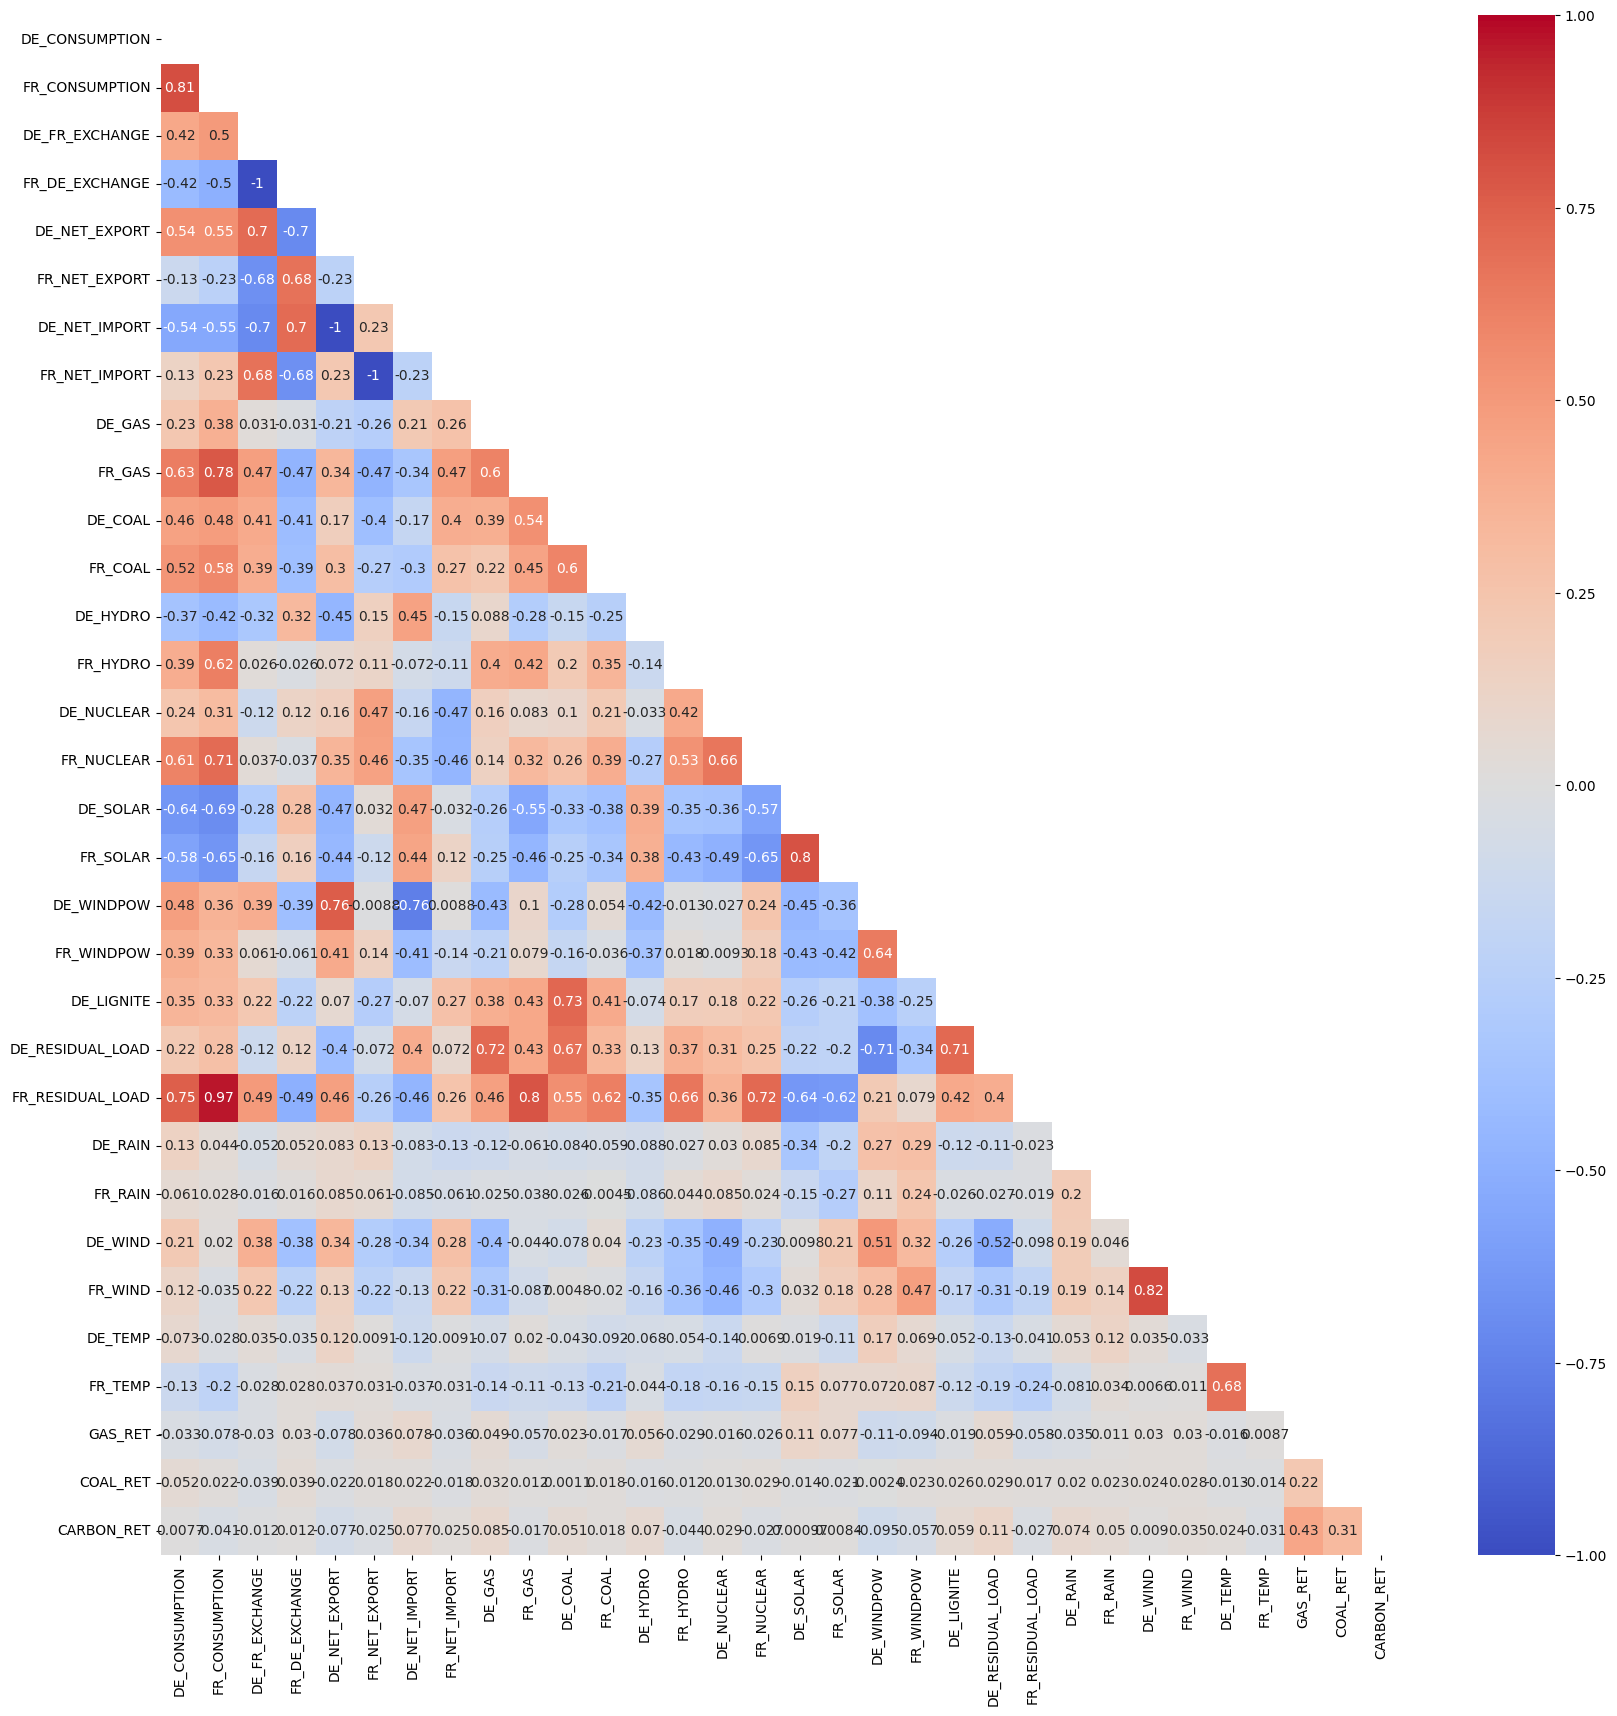

In [25]:
visualization.plot_corr(df_X_train[df_X_train.columns[3:]], width=20, height=20, print_value=True)

Index(['ID', 'DAY_ID', 'COUNTRY', 'DE_CONSUMPTION', 'FR_CONSUMPTION',
       'DE_FR_EXCHANGE', 'FR_DE_EXCHANGE', 'DE_NET_EXPORT', 'FR_NET_EXPORT',
       'DE_NET_IMPORT', 'FR_NET_IMPORT', 'DE_GAS', 'FR_GAS', 'DE_COAL',
       'FR_COAL', 'DE_HYDRO', 'FR_HYDRO', 'DE_NUCLEAR', 'FR_NUCLEAR',
       'DE_SOLAR', 'FR_SOLAR', 'DE_WINDPOW', 'FR_WINDPOW', 'DE_LIGNITE',
       'DE_RESIDUAL_LOAD', 'FR_RESIDUAL_LOAD', 'DE_RAIN', 'FR_RAIN', 'DE_WIND',
       'FR_WIND', 'DE_TEMP', 'FR_TEMP', 'GAS_RET', 'COAL_RET', 'CARBON_RET'],
      dtype='object')

In [73]:

model = LinearRegression()
model.fit(df_X_train_fr, df_y_train_fr['TARGET'])


LinearRegression()

In [75]:
y_predict = model.predict(df_X_train_fr)
print(spearmanr(y_predict, df_y_train_fr['TARGET']).correlation)

0.22230679657142144


In [76]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=10)
model.fit(df_X_train_fr, df_y_train_fr['TARGET'])

Ridge(alpha=10)

In [79]:
result_y = model.predict(df_X_train_fr)
print(spearmanr(result_y, df_y_train_fr['TARGET']).correlation)

0.23177915829632
